# Temperatura del procesador

Tenemos un sensor de temperatura en el procesador el servidor de nuestra empresa. Queremos analizar los datos proporcionados para analizar si debemos cambiar de sistema de refrigeración por uno mejor. Es caro y como analista de datos no podemos tomar decisiones sin base. 

Proporcionamos las temperaturas medidas a lo largo de las 24 horas de un día en una estructura de datos tipo lista compuesta de 24 números enteros: 
```
temperaturas_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Gráfica de temperaturas
Para facilitar el entendimiento se te muestra a continuación la gráfica de temperatura. No tienes que hacer nada en este apartado. La prueba empieza en **Problema**. 

In [2]:
# eje x, eje y
y = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

In [3]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

Text(0.5, 1.0, 'Temperaturas de nuestro servidor a lo largo del día')

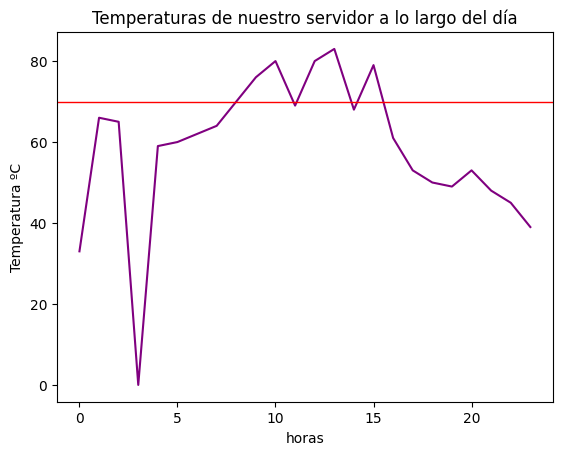

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# eje x, eje y
y = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# imprimir figura
plt.plot(x, y, color='purple')
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('horas')
plt.ylabel('Temperatura ºC')
plt.title('Temperaturas de nuestro servidor a lo largo del día')

## Problema

Si el sensor detecta más de 4 horas con temperaturas mayores o igual que 70ºC o alguna temperatura superior a 80ºC o la media fuera superior a 65ºC a lo largo de todo el día, deberemos dar la orden de cambiar el sistema de refrigeración para evitar dañar el procesador. 

Te vamos a guiar paso a paso para que puedas tomar la decisión calculando algunos pasos intermedios: 

1. Temperatura mínima
2. Temperatura máxima
3. Temperaturas igual o superior a 70ºC
4. Media de temperaturas a lo largo del día. 
5. Si hubiera un fallo en el sensor a las 03:00 y no capturáramos el dato, ¿Cómo estímarias el valor que nos falta? Corrige ese valor en la lista de temperaturas. 
6. Bonus: Nuestro personal de mantenimiento es de Estados Unidos y no entiende el sistema métrico internacional. Pása las temperaturas a Grados Fahrenheit.

Fórmula: F = 1.8 * C + 32

web: https://es.wikipedia.org/wiki/Grado_Fahrenheit

In [20]:
# asigna a una variable la lista de temperaturas
temperaturas_C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calcula el minimo de la lista e imprime el valor con print()

#temp_C recibe array numpy de temperaturas

temp_C=np.array(temperaturas_C)
print(f"Minimo: {np.amin(temp_C)} ºC")

# 2. Calcula el máximo de la lista e imprime el valor con print()
temp_C=np.array(temperaturas_C)
print(f"Máximo: {np.amax(temp_C)} ºC")

# 3. Elementos de la lista que son mayores que 70ºC e imprime el resultado
superior_70=[i for i in temperaturas_C if i>70]
print(f"Temperaturas >70ºC: {superior_70}")

# 4. cálculo de la media de temperaturas a lo largo del día e imprime resultado
avg=np.average(temp_C)
print(f"Media Temperatura durante el día: {avg} ºC")

# 5.1 Soluciona el fallo en el sensor estimando un valor
estimado=0


# 5.2 Actualización del valor estimado a las 03:00 en la lista
temperaturas_C[4]=estimado

# Bonus: pasar la lista de ºC a grados Farenheit
print("__ Farenheit ________")
temperaturas_F=[round(i*1.8+32, 2) for i in temperaturas_C]
print(temperaturas_F)


Minimo: 0 ºC
Máximo: 90 ºC
Temperaturas >70ºC: [76, 80, 81, 80, 83, 90, 79]
Media Temperatura durante el día: 60.25
__ Farenheit ________
[91.4, 150.8, 149.0, 32.0, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Toma la decisión
Recuerda que si el sensor detecta más de 4 horas con temperaturas mayores o igual que 70ºC o alguna temperatura superior a 80ºC o la media fuera superior a 65ºC a lo largo de todo el día, deberemos dar la orden de cambiar el sistema de refrigeración para evitar el peligro de dañar el equipamiento: 
* más de 4 horas con temperaturas mayores o igual que 70ºC
* alguna temperatura superior a 80ºC
* media fuera superior a 65ºC a lo largo de todo el día
Si se cumple alguna de estas tres habrá que cambiar el sistema de refrigeración. 

In [39]:
# Imprime True o False en función de si cambiarías el sistema de refrigeración o no
#cuenta si las repeticiones >de 70º son >=4
def cambio_sistema():
 contador_temp=0
 i=0
 t80=True #Si encuentra temperatura > 80º
 resultado=True
 while contador_temp<4 and i<len(temperaturas_C) and t80==True and avg<65:
  if temperaturas_C[i]<70: contador_temp=0
  if temperaturas_C[i]>=70: contador_temp+=1
  if temperaturas_C[i]>=80: t80=False
  i+=1

 if t80==False: print("Temperatura>80º"); resultado=True
 if contador_temp==4: 
  resultado=True
  print("Temperatura > 70º más de 4 horas")
  print(f"Horas seguidas > 70º: {contador_temp}")
 if avg>65: 
  resultado=True
  print("Media temperatura _{avg}_ >65º. Cambio de sistema")
 return (print(f"Cambio de sistema: {resultado}"))

cambio_sistema()

Temperatura>80º
Cambio de sistema: True


## Objetivos

1. Tratamiento de listas
2. Uso de bucle o list comprenhention
3. Cálculo de la media, minimo y máximo. 
4. Filtrado de listas. 
5. Interpolar un valor atípico. 
6. Operadores lógicos. 
7. Imprimir por consola